We are going to use two types of methods for feature selection 
1. Filter Method
2. Wrapper Method

## Filter Method
Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. 


1. Correlation 
2. Annova Test
3. Chisquare Test

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Bigmart Sales Cleaned Dataset.csv')

In [3]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Correlation 

In [5]:
corr = data.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017734,0.024993,-0.008225,0.012082
Item_Visibility,-0.017734,1.000000,-0.004817,-0.079027,-0.133044
Item_MRP,0.024993,-0.004817,1.000000,0.006672,0.567642
Outlet_Establishment_Year,-0.008225,-0.079027,0.006672,1.000000,-0.044172
Item_Outlet_Sales,0.012082,-0.133044,0.567642,-0.044172,1.000000


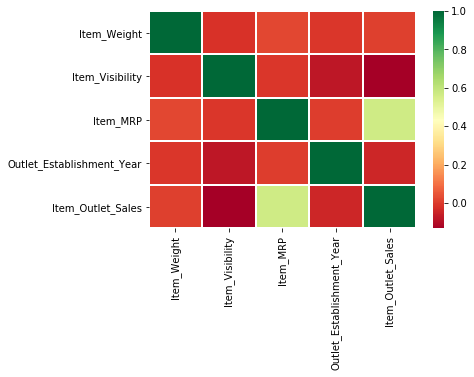

In [6]:
sb.heatmap(corr,cmap='RdYlGn',linewidths=1.0)

- As correlation can only find relationship between two continous variables as we can see there is high correlation between MRP and Sales
- To find the correlation between categorical and continous variable lets use Annova t-test

In [7]:
data.select_dtypes(['object']).columns

Index(['Item_Identifier', 'Item_Code', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
#for i in data.select_dtypes(['object']).columns:
#    data[i] = encoder.fit_transform(data[i])
    


In [10]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\rakes\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


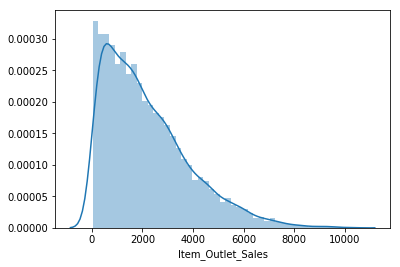

In [11]:
sb.distplot(data.Item_Outlet_Sales)

In [12]:
stat.skew(data.Item_Outlet_Sales)

1.10677271038991

### Annova t-test

In [13]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
fat_countentGroups = data.groupby('Item_Fat_Content').groups

In [15]:
fat_countentGroups

{'Low Fat': Int64Index([   0,    2,    7,   10,   14,   18,   19,   23,   27,   30,
             ...
             8488, 8490, 8496, 8499, 8502, 8504, 8505, 8508, 8511, 8515],
            dtype='int64', length=3915),
 'No Fat': Int64Index([   4,   16,   22,   25,   31,   35,   46,   50,   54,   56,
             ...
             8469, 8481, 8487, 8491, 8492, 8493, 8495, 8497, 8509, 8513],
            dtype='int64', length=1597),
 'Regular': Int64Index([   1,    3,    5,    6,    8,    9,   11,   12,   13,   15,
             ...
             8494, 8498, 8500, 8501, 8503, 8506, 8507, 8510, 8512, 8514],
            dtype='int64', length=3004)}

In [16]:
low_fat =  data.iloc[fat_countentGroups['Low Fat'],-1]
no_fat = data.iloc[fat_countentGroups['No Fat'],-1]
Regular = data.iloc[fat_countentGroups['Regular'],-1]

In [17]:
low_fat

0       3735.1380
2       2097.2700
7       4022.7636
10      1516.0266
14      1977.4260
18      2303.6680
19      2748.4224
23       214.3876
27       308.9312
30       163.7868
32      3068.0064
33      2174.5028
34      2085.2856
39      2180.4950
40      3435.5280
41      2150.5340
42      2527.3768
43      6768.5228
45       358.2004
47      5815.0972
51       850.8924
53      3121.2704
55      6258.5200
57       796.9626
58      4910.2750
59       892.1720
60      3185.1872
62       484.7024
64      2543.3560
65       184.4266
          ...    
8443    1844.9318
8444    3254.4304
8448    4206.5244
8450    1516.6924
8451     452.7440
8452     741.0354
8454    4165.2448
8456     810.9444
8459     673.7896
8460    3881.6140
8461     467.3916
8466     431.4384
8471    4820.3920
8472    2579.3092
8473     459.4020
8476    1612.5676
8477    2324.9736
8478    6261.8490
8480    4111.3150
8485    2419.5172
8488    4314.3840
8490    2247.0750
8496    3392.9168
8499    3944.8650
8502     4

In [18]:
stat.f_oneway(low_fat,no_fat,Regular)

F_onewayResult(statistic=1.752868360305447, pvalue=0.1733387450382656)

In [19]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
dairy_sales = data.loc[data.Item_Type == 'Dairy',['Item_Outlet_Sales']]
soft_drinks_sales = data.loc[data.Item_Type == 'Soft Drinks',['Item_Outlet_Sales']]
meat_sales = data.loc[data.Item_Type=='Meat',['Item_Outlet_Sales']]
fruits_vegetables_sales = data.loc[data.Item_Type=='Fruits and Vegetables',['Item_Outlet_Sales']]
household_sales = data.loc[data.Item_Type=='Household',['Item_Outlet_Sales']]
baking_goods_sales = data.loc[data.Item_Type=='Baking Goods',['Item_Outlet_Sales']]
snack_Foods_sales = data.loc[data.Item_Type=='Snack Foods',['Item_Outlet_Sales']]
frozen_Foods_sales = data.loc[data.Item_Type=='Frozen Foods',['Item_Outlet_Sales']]
breakfast_sales = data.loc[data.Item_Type=='Breakfast',['Item_Outlet_Sales']] 
health_Hygiene_sales = data.loc[data.Item_Type == 'Health and Hygiene',['Item_Outlet_Sales']]
hard_drinks_sales = data.loc[data.Item_Type == 'Hard Drinks',['Item_Outlet_Sales']]
canned_sales = data.loc[data.Item_Type == 'Canned',['Item_Outlet_Sales']]
breads_sales = data.loc[data.Item_Type == 'Breads',['Item_Outlet_Sales']] 
starchy_Foods_sales = data.loc[data.Item_Type == 'Starchy Foods',['Item_Outlet_Sales']]
Others_sales = data.loc[data.Item_Type == 'Others',['Item_Outlet_Sales']]
Seafood_sales = data.loc[data.Item_Type == 'Seafood',['Item_Outlet_Sales']]

In [21]:
stat.f_oneway(dairy_sales,soft_drinks_sales,meat_sales,fruits_vegetables_sales,household_sales,baking_goods_sales,snack_Foods_sales,frozen_Foods_sales,
              breakfast_sales,health_Hygiene_sales,hard_drinks_sales,canned_sales,breads_sales,starchy_Foods_sales,Others_sales,Seafood_sales)

F_onewayResult(statistic=array([2.60457852]), pvalue=array([0.00063888]))

In [22]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [23]:
out049_sales = data.loc[data.Outlet_Identifier=='OUT049',['Item_Outlet_Sales']]
out018_sales = data.loc[data.Outlet_Identifier=='OUT018',['Item_Outlet_Sales']]
out010_sales = data.loc[data.Outlet_Identifier=='OUT010',['Item_Outlet_Sales']]
out013_sales = data.loc[data.Outlet_Identifier=='OUT013',['Item_Outlet_Sales']]
out027_sales = data.loc[data.Outlet_Identifier=='OUT027',['Item_Outlet_Sales']]
out045_sales = data.loc[data.Outlet_Identifier=='OUT045',['Item_Outlet_Sales']]
out017_sales = data.loc[data.Outlet_Identifier=='OUT017',['Item_Outlet_Sales']]
out046_sales = data.loc[data.Outlet_Identifier=='OUT046',['Item_Outlet_Sales']]
out035_sales = data.loc[data.Outlet_Identifier=='OUT035',['Item_Outlet_Sales']]
out019_sales = data.loc[data.Outlet_Identifier=='OUT019',['Item_Outlet_Sales']]

In [24]:
stat.f_oneway(out049_sales.Item_Outlet_Sales,out018_sales.Item_Outlet_Sales,out010_sales.Item_Outlet_Sales,out013_sales.Item_Outlet_Sales,out027_sales.Item_Outlet_Sales,out045_sales.Item_Outlet_Sales,out017_sales.Item_Outlet_Sales,out046_sales.Item_Outlet_Sales,out035_sales.Item_Outlet_Sales,out019_sales.Item_Outlet_Sales)

F_onewayResult(statistic=301.2128366175585, pvalue=0.0)

In [25]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
data.Item_Code.replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'},inplace=True)

In [27]:
data.rename(columns={"Item_Code":"Item_Type_Code"},inplace=True)

In [28]:
Food_sales = data.loc[data.Item_Type_Code=='Food',['Item_Outlet_Sales']]
Drinks_sales = data.loc[data.Item_Type_Code=='Drinks',['Item_Outlet_Sales']]
NC_Sales = data.loc[data.Item_Type_Code=='Non-Consumable',['Item_Outlet_Sales']]

In [29]:
stat.f_oneway(Food_sales.Item_Outlet_Sales,Drinks_sales.Item_Outlet_Sales,NC_Sales.Item_Outlet_Sales)

F_onewayResult(statistic=6.166683986049588, pvalue=0.0021075666436235776)

In [30]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [31]:
Tier1_sales = data.loc[data.Outlet_Location_Type == 'Tier 1',['Item_Outlet_Sales']]
Tier2_Sales = data.loc[data.Outlet_Location_Type == 'Tier 2',['Item_Outlet_Sales']]
Tier3_Sales = data.loc[data.Outlet_Location_Type == 'Tier 3',['Item_Outlet_Sales']]

In [32]:
stat.f_oneway(Tier1_sales.Item_Outlet_Sales,Tier2_Sales.Item_Outlet_Sales,Tier3_Sales.Item_Outlet_Sales)

F_onewayResult(statistic=54.17568496483287, pvalue=4.171296493760977e-24)